In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt


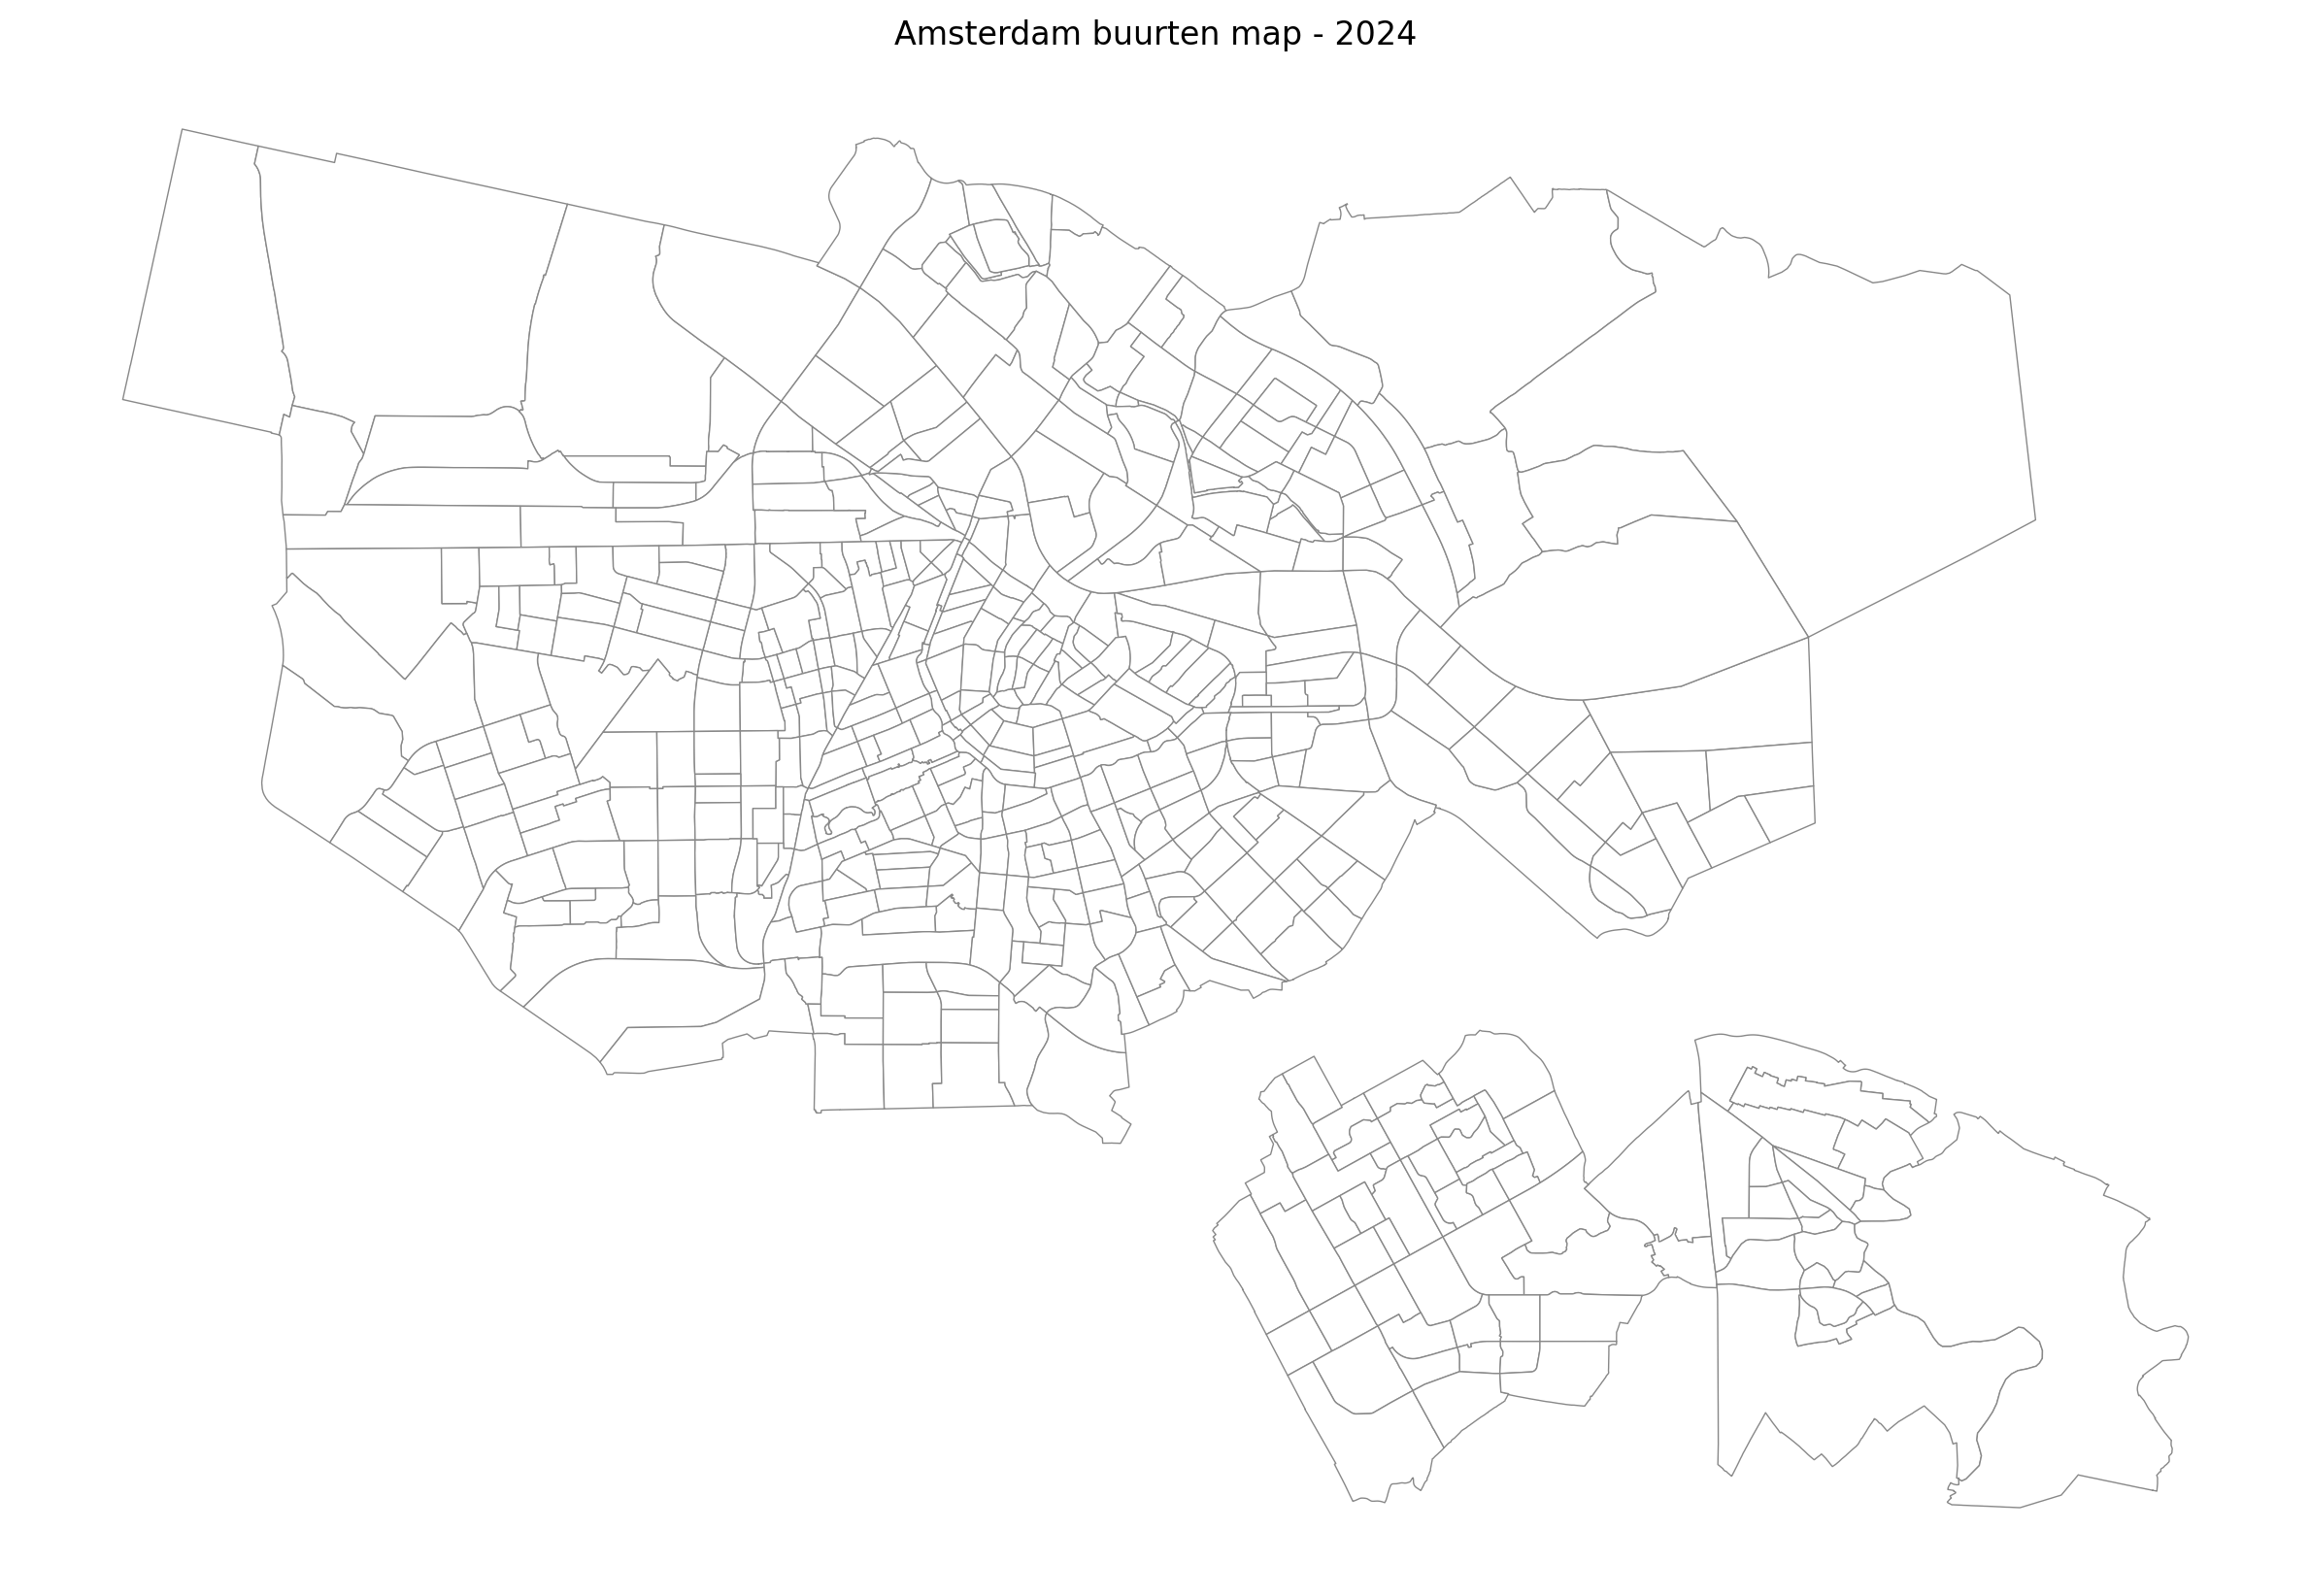

In [2]:
map_df = pd.read_excel("buurten all 2025-06-17 22.10.21.xlsx")

map_df["geometrie_clean"] = map_df["geometrie"].str.replace("SRID=28992;", "", regex=False)

map_df["geometry"] = map_df["geometrie_clean"].apply(wkt.loads)

gdf = gpd.GeoDataFrame(map_df, geometry="geometry", crs="EPSG:28992")

fig, ax = plt.subplots(figsize=(12, 12), dpi=200)

gdf.plot(
    ax=ax,
    column=None,              
    color="#ffffff",           
    edgecolor="#888888",        
    linewidth=0.5          
)
# gdf.plot(ax=ax, column="naam", cmap="tab20", edgecolor="black", linewidth=0.4, legend=False)
plt.title("Amsterdam buurten map - 2024")
plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
pc_brt = pd.read_csv("2024-cbs-pc6huisnr20240801_buurt_20250218/pc6hnr20240801_gwb.csv") 

pc_brt = pc_brt[pc_brt["Gemeente2024"] == 363]

pc_brt = pc_brt[["PC6", "Buurt2024"]].drop_duplicates()

pc_brt = pc_brt.rename(columns={"PC6": "postcode", "Buurt2024": "buurtcode"})


/var/folders/gk/m5zn932n53d3pgr65lvt82cw0000gn/T/ipykernel_11278/3670836740.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pc_brt = pd.read_csv("2024-cbs-pc6huisnr20240801_buurt_20250218/pc6hnr20240801_gwb.csv")


In [9]:
map_df["buurtcode"] = map_df["cbs_code"].str.replace("BU", "", regex=False)

# pc_brt = pc_brt.rename(columns={"Buurt2024": "buurtcode"})  

merged = pc_brt.merge(map_df, on="buurtcode", how="left")

In [10]:
merged.to_csv("merged.csv", index=False)


In [11]:
cleaned_df = pd.read_csv("cleaned_household_data.csv")
cleaned_df["postcode6"] = cleaned_df["postcode6"].str.upper().str.strip()

final_df = merged.merge(cleaned_df, left_on="postcode", right_on="postcode6", how="left")

final_df = final_df.drop(columns=["postcode6"])

final_df.to_csv("data_for_import_geo.csv", index=False)
